Run the cell below to start a slideshow of the following notebook.

In [ ]:
!jupyter nbconvert NeuroLex\ Demo\ Day.ipynb --to slides --post serve

# NeuroLex Demo Day 
# train-emotions
## Speech emotion analysis

### Lucas Lyon
lucas.lyon@colorado.edu


# Code available at https://github.com/NeuroLexDiagnostics/train-emotions

# Data available at https://drive.google.com/file/d/1aWr0AsvYm2okmirbUqy4Ql2xQgEuyDzf/view?usp=sharing

# Introduction

## Aim of this demo:

### - to demonstrate the progress made in detecting one of seven emotions in an audio file (angry, disgust, fear, happy, neutral, sad, or surprise)

### - to describe successes and failures encountered during the NeuroLex Fellowship.

# Problem Statement / Motivation


## NeuroLex lacks a way to extract emotion data from speech


- NeuroLex isn't providing its customers with the entire picture
- Customers are ** missing out on emotion speech data ** that can inform on sentiment

## NeuroLex customers could benefit from additional data

- Emotion data could give customers **a greater understanding of how survey takers are feeling** beyond just word choice.

# Benefits for NeuroLex

- Ability to offer customers **more data**
- More data allows NeuroLex to **increase revenue** without requiring new inputs (we already have the speech files)

# Benefits for customers

- More data == **more monetization opportunities**
- More data  == **more effective marketing**
- More data == **more knowledge about customer sentiment**

# Previous Work

## Text-based analysis:
- IBM Watson Speech to Text and Tone:
    - Converts audio to text, then analyzes 
    
## Audio-based analysis
- PRAAT: doing phonetics by computer:
    - Indirect measure of emotion given an audio file
    - Pitch, frequency, duration, etc
- MIRtoolbox:
    - Focused on musical features, like tonality, rhythm, structures, etc
- Work by Jim Schwoebel
    - Used a YouTube scraper to pull audio samples from playlists
    - Offered huge amounts of data



# Current Work

## Tools Used


### - Jupyter Notebooks
### - LibROSA
### - Keras 
### - Pandas
### - Matplotlib

## Datasets

# 1. CREMA-D: Crowd-sourced Emotional Multimodal Actors Dataset
#### *Available in NeuroLexTrainingData.zip in directory /training_audio_files/AudioWAV*
#### *Available for download at https://github.com/CheyneyComputerScience/CREMA-D*
### 7442 files
### 91 actors, 48 males and 43 females
### 20-74 years old
### Variety of races and ethnicities: African America, Asian, Caucasian, Hispanic, and Unspecified
### 95% of clips have more than 7 ratings (from a total of 2443 raters)


# 2. SAVEE: Surrey Audio-Visual Expressed Emotion Database

#### *Available in NeuroLexTrainingData.zip in directory /training_audio_files/AudioData*
#### *Available for download at http://kahlan.eps.surrey.ac.uk/savee/Download.html*

### 480 files

### 4 male actors

### No race or age data

# 3. TESS: Toronto emotional speech set

#### *Available in NeuroLexTrainingData.zip in directory /training_audio_files/angry, /training_audio_files/disgust, /training_audio_files/fear, etc*

#### *Available for download at https://tspace.library.utoronto.ca/handle/1807/24487*

### 2800 files

### 200 unique words spoken

### 2 female actresses aged 26 and 64 years

### Both actresses speak English as their first language, are university educated, and have musical training



# 4. RAVDESS: Ryerson Audio-Visual Database of Emotional Speech and Song
#### *Available in NeuroLexTrainingData.zip in directory /Audio*
#### *Available for download at https://zenodo.org/record/1188976*

### 7356 files

### 12 males and 12 females

### Neutral North American accent

# 5. Emo-DB: Berlin Database of Emotional Speech
#### *Available in NeuroLexTrainingData.zip in directory /training_audio_files/emodb*
#### *Available for download at http://emodb.bilderbar.info/start.html*

### German recordings

### 535 files

### 10 actors

### No demographic data provided

### Incorporated least-heavily among this demo's attempts to build a robust model

# Results

In [1]:
from IPython.core.display import Image, display

# Attempt -1 Accuracy

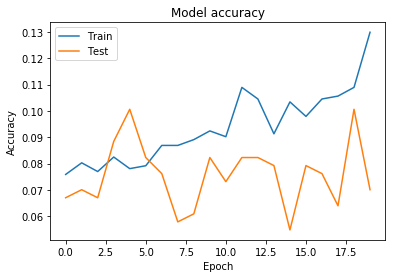

In [2]:
Image(filename="../Report/Graphs/AccuraciesAndLosses/Attempt-1Acc.png")

## Final Accuracy values of approximately 8% (slightly worse than guessing @ 14%)

# Attempt 0 Accuracy

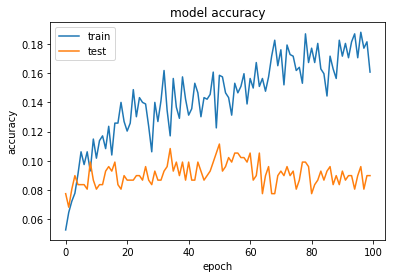

In [3]:
Image(filename="../Report/Graphs/AccuraciesAndLosses/Attempt0Acc.png")

## Final accuracy values of approximately 9% (again, worse than guessing)

# Attempt 1 Accuracy

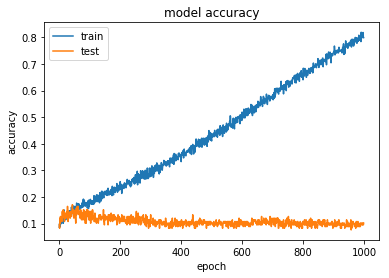

In [4]:
Image(filename="../Report/Graphs/AccuraciesAndLosses/Attempt1Acc.png")

## Final accuracy values of approximately 10% (again, worse than guessing)

# Attempt 2 Accuracy

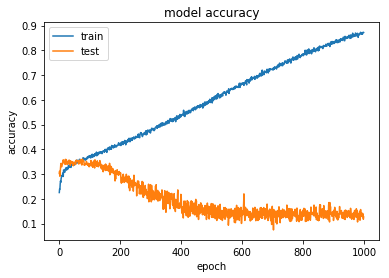

In [5]:
Image(filename="../Report/Graphs/AccuraciesAndLosses/Attempt2Acc.png")

## Final accuracy values of approximately 11% (again, worse than guessing)

# Attempt 3 Accuracy

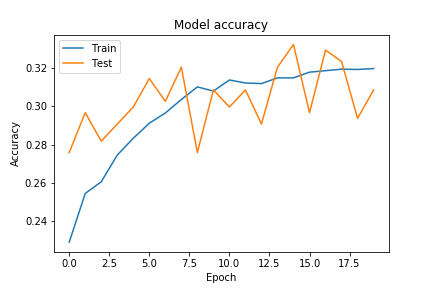

In [6]:
Image(filename="../Report/Graphs/AccuraciesAndLosses/Attempt3Acc.png")

## Final Accuracy values of approximately 27% (getting better)

# Summary of accuracies and losses for all models tested

| Model | Accuracy | Loss | Approximate training time |
| - | - | - | - |
| v_-1 | 8% | 1.75 | 133 minutes |
| v_0 | 9% | 2.3 | 121 minutes |
| v_1 | 11% | 2.1 | 166 minutes |
| v_2 | 11% | 1.65 | 45 minutes |
| v_3 | 26.41% | 1.72 | 103 minutes |
| v_4 | 22.98% | 13548.02 | 105 minutes |
| v_5 | 87.36% | 0.3627 | 28 minutes |
| v_6 | 53.76% | 1.3007 | 22.5 minutes |
| v_7 | 70% | 1.64 | 83 minutes |
| v_8 | 70% | 1.64 | 83 minutes |
| v_9 | 51.09% | 2.2915 | 92.5 minutes |

# What happened with Model v5?

## 1. New Data
- v5 uses Toronto Emotional Speech Set, SAVEE, and CREMA-D

# 2. Simpler Architecture
- v5 uses a slimmer architecture with 50% fewer convolutions

# v5 Architecture

In [ ]:
model = Sequential()

model.add(Conv1D(32, 5, padding='same',input_shape=(216,1)))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(64, 5, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2))

model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(num_classes))
model.add(Activation('softmax'))

# Validation

## 1. Load the model

In [12]:
import librosa
import numpy as np
from keras.models  import load_model
model = load_model("model_v5.h5")

## 2. Load and transform the wav file 

In [13]:
#load the file
X, sample_rate = librosa.load("test_sample.wav", res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)

#convert array into numpy array
sample_rate = np.array(sample_rate)

#calculate MFCC mean
mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13),axis=0)

#store in temporary variable
test_sample_features = mfccs

#pad and reshape the MFCC feature extraction for input into the model
test_sample_features = np.pad(test_sample_features, (0, 216-test_sample_features.shape[0]), 'constant')
test_sample_features = test_sample_features.reshape(1, 216, 1)

## 3. Input MFCC feature extraction into the model for a prediction

In [14]:
# 0 angry
# 1 fear
# 2 disgust
# 3 happy
# 4 sad
# 5 neutral
# 6 surprise

prediction = model.predict_classes(test_sample_features)
print(prediction)

[4]


# Comparison of results to goal


### One goal of the demo was to beat prior models' performances. This demo produced "model_v5.h5". "all_emotions.pickle" was created by Jim Schwoebel.

| Model | Feature embedding | Accuracy | Modeltype|
| --- | --- | --- | --- |
| all_emotions.pickle | character, pos, polarity, onset, rhythm, spectral | 28.75% | knn |
| model_v5.h5 | spectral | 87.36% | Keras Sequential Neural Network |


### With an increase in accuracy of 58.61%, the Keras Sequential model thoroughly out-performs NeuroLex's current all-emotion detection.

# This demo's impact

## on myself

### - First foray in ML
### - Potential career field
    - there's so many applications!
### - ML isn't a silver bullet
    - there are limitations

## on NeuroLex

### - potential new source of data for customers
### - potential new source of revenue 

# Thanks for an amazing experience, NeuroLex team!
### I hope to keep doing awesome work with all of you